# Lab 10 Data Analysis

In [1]:
#Import statments

import numpy as np
import scipy as sci
import matplotlib
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.interpolate import interp1d

Here we use `half_T` array to denote the times of each of the peaks relative to where the decaying sine wave starts. In other words, the measurement was started when the voltage first appears to take on a nonzero value.

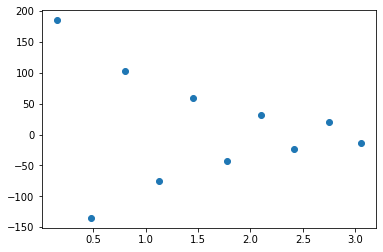

In [2]:
half_T = np.array([0.150, 0.480, 0.802, 1.128, 1.450, 1.778, 2.100, 2.418, 2.746, 3.058])
voltage = np.array([185, -135, 103, -75, 59, -43, 31, -23, 21, -13])

plt.scatter(half_T, voltage) #Plotting the peaks just to see if we've imported all the data properly.
plt.show()

From the manual, underdamped motion of an oscillator, also from the manual, is described by the equation:

$$ x = Ae^{-\alpha t}\cos (\omega t - \varphi)$$

So this means that the amplitude decays with proportionality equal to $Ae^{-\alpha t}$. Since we only have the peak amplitudes, we will fit using $\pm Ae^{-\alpha t}$ since it's the only portion of the function which affects the amplitude. 

In [3]:
def function2(t, A, alpha):
    return A*np.exp(-alpha *t)

def function3(t, A, alpha):
    return -A*np.exp(-alpha*t)

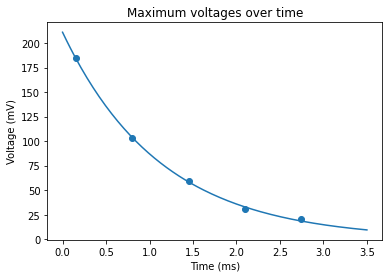

alpha: 0.885762014427269 ± 0.016600861216310235
A: 210.9735906852393 ± 2.340573466383997


In [4]:
voltage_pos = voltage[voltage > 0]
new_time = [0.150, 0.802, 1.450, 2.100, 2.746] #Manually copied over the times when the voltage is positive 

opt, cov = opt.curve_fit(function2, new_time, voltage_pos)
A, alpha = opt
dA, dalpha = np.sqrt(np.diag(cov))

x_values = np.linspace(0, 3.5, 150)
y_values = function2(x_values, A, alpha)

plt.plot(x_values, y_values)
plt.scatter(new_time, voltage_pos)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("Maximum voltages over time")
plt.show()


print(f"alpha: {alpha} \u00b1 {dalpha}")
print(f"A: {A} \u00b1 {dA}")

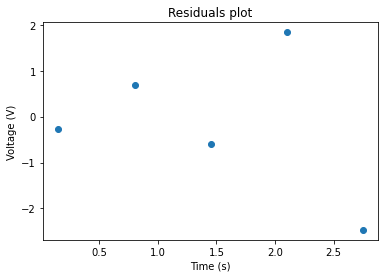

In [5]:
res = []
for i in range(len(new_time)):
    res.append(function2(new_time[i], A, alpha) - voltage_pos[i])

plt.scatter(new_time, res)
plt.title("Residuals plot")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

The period of oscillation is also given by the difference in time between peaks. We compute the average distance between peaks:
 

In [6]:
T = []
for i in range(len(new_time)-1):
    T.append(new_time[i+1] - new_time[i])

average_T = np.mean(T)
omega = 2*np.pi/average_T
err_t = np.std(T, ddof=1)
print(f"omega = {omega} \u00b1 {err_t}")

omega = 9.6813332930348 ± 0.0025819888974716854


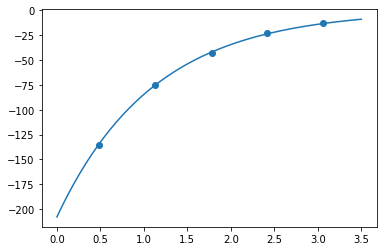

alpha: 0.8995586741117932 ± 0.009047182485952265
A: 207.87101717281973 ± 1.7132682420085676


In [7]:
import scipy.optimize as opt

voltage_neg= voltage[voltage < 0]
new_time2 = [0.480, 1.128, 1.778, 2.418, 3.058]

opt2, cov2 = opt.curve_fit(function3, new_time2, voltage_neg)
A2, alpha2 = opt2
dA2, dalpha2 = np.sqrt(np.diag(cov2))


x_values2 = np.linspace(0, 3.5, 150)
y_values2 = function3(x_values2, A2, alpha2)

plt.plot(x_values2, y_values2)
plt.scatter(new_time2, voltage_neg)
plt.show()


print(f"alpha: {alpha2} \u00b1 {dalpha2}")
print(f"A: {A2} \u00b1 {dA2}")

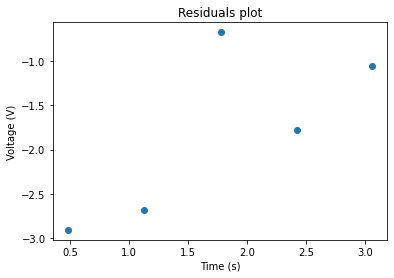

In [9]:
res2 = []
for i in range(len(new_time2)):
    res2.append(function3(new_time2[i], A, alpha) - voltage_neg[i])

plt.scatter(new_time2, res2)
plt.title("Residuals plot")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

In [8]:
T2 = []
for i in range(len(new_time2)-1):
    T2.append(new_time2[i+1] - new_time2[i])

average_T2 = np.mean(T2)
err_t2 = np.std(T2, ddof=1)
omega2 = 2*np.pi/average_T2
print(f"omega = {omega2} \u00b1 {err_t2}")

omega = 9.748929879254595 ± 0.005259911279353249
